# <center> **Prevendo a performance dos estudantes no ENEM 2019 utilizando os dados do Ministerio da Educação** </center>

<center> Erika Costa Aves - commanderclarice@gmail.com </center>

## **1. Resumo**
> Nessa pequeno trabalho será descrito como foi feita uma análise, baseada nos dados fornecidos pelo Ministerio da Educação, de como as escolas públicas estaduais falham em atender as necessidades educacionais da população, e como isso é notório baseado nas performances dos estudantes na prova do ENEM 2019.  Em seguida, com base na análise das escolas, é feito um modelo de aprendizado de máquina para prever a performance dos candidatos do ENEM 2019 baseada na educação que tiveram no ensino médio.

## **2. Introdução**

> Na constituição de 1988, especificamente o artigo 205, é dito: "Art. 205. A educação, direito de todos e dever do Estado e da família, será promovida e incentivada com a colaboração da sociedade, visando ao pleno desenvolvimento da pessoa, seu preparo para o exercício da cidadania e sua qualificação para o trabalho." [1], ou seja, **é dever do estado dar uma educação de qualidade para o indivíduo para que ele possa, futuramente, ter uma boa qualidade de vida**. Mas será que de fato o estado está cumprindo com seus deveres para com a sociedade? De acordo com uma pesquisa feita pelo IBGE (Instituto Brasileiro de Geografia e Estatística), a educação do Brasil ainda não é acessível para todos [2]: cerca de 40% dos adultos acima de 25 anos não tinham ensino fundamental, cerca de 30% das pessoas que faziam ensino médio possuiam defasagem em relação a idade/série, e **esses dados se tornavam piores em relação a pessoas negras**. 

> Uma grande questão é, se nem toda pessoa tem acesso a sequer uma educação, é de se questionar qual a qualidade do serviço educacional no Brasil. Por isso, esse pequeno trabalho surgiu com o objetivo de analisar a educação das pessoas que prestaram o ENEM 2019 (Exame nacional do Ensino Médio): O ENEM é uma prova que avalia os alunos do ensino médio de todo o Brasil para que possam posteriormente entrar em alguma universidade.

> Nesse trabalho será utilizado os dados referentes aos alunos que prestaram a prova do ENEM 2019 no Rio Grande do Norte, e posteriormente será feito um modelo de Machine Learning pra predizer as notas dos alunos baseando-se na origem socio-econômica do candidato e na escola que fez o ensino médio.




## **3. Base de dados utilizadas**

> Para esse pequeno trabalho foram utilizadas duas bases de dados diferentes: a primeira referente ao ENEM 2019 [3], em específico apenas os dados do Rio Grande do Norte. A segunda base de dados utilizada foi a do IDEB 2019, que é uma base de dados que analisa a educação básica no Brasil [4].


### 3.1 ENEM 2019

> Nesta base de dados há dados sobre cada candidato que prestou o ENEM 2019. Nela há as condições socio-econômicas e até mesmo dados sobre alguma dificuldade de aprendizado ou deficiência.

### 3.2 IDEB

> Na base de dados do IDEB 2019 há dados sobre a performance das escolas de ensino básico, ou seja, do ensino fundamental(anos iniciais e finais) e ensino médio. Para a análise desse trabalho será apenas utilizado a performance das escolas do ensino médio.



## **4. Analise Exploratoria dos Dados**

> Nesta seção iremos explorar os nossos bancos de dados para analisar a educação básica do RN(Rio Grande do Norte).


### 4.1 Proporção das escola publicas e privadas

> O primeiro gráfico que iremos analisar será um gráfico sobre as escolas que os candidatos vão se graduar no ensino médio, visualizando a proporção entre escolas públicas e particulares dos candidatos. Nos dados há quatro tipos de categorias: pública, privada, não respondeu e exterior. O número de pessoas de escolas do exterior é zero, logo foi desconsiderado na análise. Em relação aos que 'não responderam', julgamos ser aqueles que já terminaram o ensino médio e estão fazendo novamente o ENEM. Os resultados do gráfico podem ser vistos na **Figura 1**.

In [ ]:
# Baixando os dados #
estado = "rn"
uri = f"https://github.com/alura-cursos/imersao-dados-2-2020/blob/master/por%20estado/{estado}.csv.zip?raw=true"
arquivo = f'{estado}.csv.zip'
!wget -O $arquivo $uri

--2020-10-25 17:26:48--  https://github.com/alura-cursos/imersao-dados-2-2020/blob/master/por%20estado/rn.csv.zip?raw=true
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/alura-cursos/imersao-dados-2-2020/raw/master/por%20estado/rn.csv.zip [following]
--2020-10-25 17:26:48--  https://github.com/alura-cursos/imersao-dados-2-2020/raw/master/por%20estado/rn.csv.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/alura-cursos/imersao-dados-2-2020/master/por%20estado/rn.csv.zip [following]
--2020-10-25 17:26:48--  https://raw.githubusercontent.com/alura-cursos/imersao-dados-2-2020/master/por%20estado/rn.csv.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githu

In [ ]:
# Importando as bibliotecas e lendo nossos arquivos #
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv(arquivo, sep=';')

provas = ["NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_REDACAO"]
data["TOTAL"] = data[provas].sum(axis=1)

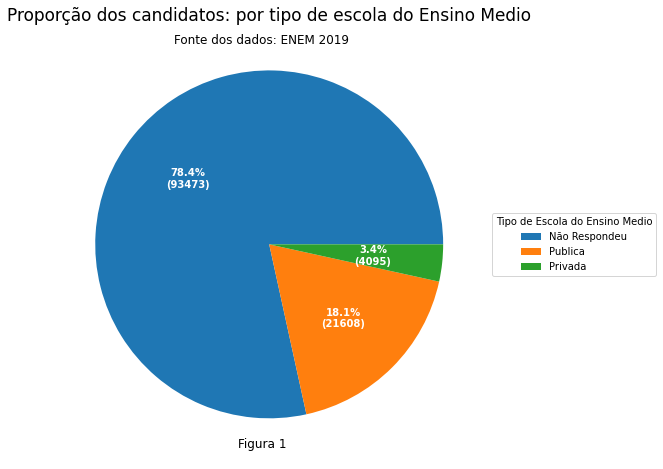

In [ ]:
# Figura 1 #

n_resp = data[data["TP_ESCOLA"] == 1].TP_ESCOLA.count()
publica = data[data["TP_ESCOLA"] == 2].TP_ESCOLA.count()
privada = data[data["TP_ESCOLA"] == 3].TP_ESCOLA.count()
#exterior = data[data["TP_ESCOLA"] == 4].TP_ESCOLA.count()

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(aspect="equal"))

valores = [n_resp, publica, privada]
nomes = ["Não Respondeu", "Publica", "Privada"]

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)

wedges, texts, autotexts = ax.pie(valores, autopct=lambda pct: func(pct, valores),
                                  textprops=dict(color="w"))

ax.legend(wedges, nomes,
          title="Tipo de Escola do Ensino Medio",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=10, weight="bold")

ax.set_title("Proporção dos candidatos: por tipo de escola do Ensino Medio", size=17)
#plt.suptitle("Proporção dos candidatos: por tipo de escola do Ensino Medio", y=1.5, fontsize=18)
plt.figtext(.5,.85,'Fonte dos dados: ENEM 2019',fontsize=12,ha='center')
plt.figtext(0.5,0.15,'Figura 1',fontsize=12,ha='center')
plt.show()

> É possivel notar, a partir da **Figura 1**, que cerca de 18% dos candidatos estão prestando o ensino médio em escola públicas, enquanto apenas 3.4% são de escolas particulares. Por outro lado 78.4% não responderam.

> Para continuar nossas análises este trabalho tomou a desisão de não considerar os dados relacionados aqueles que não responderam a questão anterior, pois queremos fazer uma análise da atual situação da educação no Brasil ou RN.

### 4.2 Relação das nota totais por tipo de Escola

> Neste tópico iremos fazer uma breve análise sobre a performace dos alunos em relação a sua escola do ensino médio. Além disso, iremos retirar os valores nulos das notas de cada candidato para obter um resultado mais conciso.

In [ ]:
# Retirando os valores nulos #
provas1 = ["NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_REDACAO", "TOTAL"]
data[provas1] = data[provas1].dropna()


# Pegando os dados apenas dos que estãão terminando o ensino medio #
data_new = data[(data["TP_ESCOLA"] == 2) | (data["TP_ESCOLA"] == 3)]

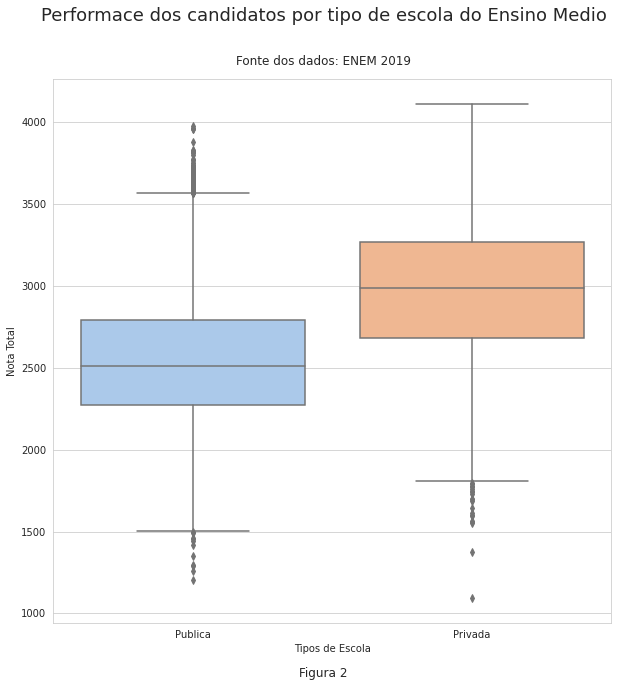

In [ ]:
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(10, 10))

ordenado = data_new["TP_ESCOLA"].sort_values().unique()

sns.set_palette("pastel")
sns.boxplot(data=data_new, y = "TOTAL", x = "TP_ESCOLA", order = ordenado)

plt.figtext(.5,.90,'Fonte dos dados: ENEM 2019',fontsize=12,ha='center')
plt.figtext(0.5,0.05,'Figura 2',fontsize=12,ha='center')
plt.suptitle("Performance dos candidatos por tipo de escola do Ensino Medio", size = 18)

plt.ylabel("Nota Total")
plt.xlabel("Tipos de Escola")
plt.xticks(labels=["Publica", "Privada"], ticks=[0,1])

plt.show()

### 4.3 Relação das notas totais em relação à dependência administrativa da escola

> É importante lembrar que no Brasil a educação pública é dividida por diferentes governos, sendo eles: o governo municipal, estadual, e federal. Para isso, vamos fazer a mesma análise anterior, sendo que para as dependências administrativas da escolas. O resultado é possível ser visto na **Figura 3**.

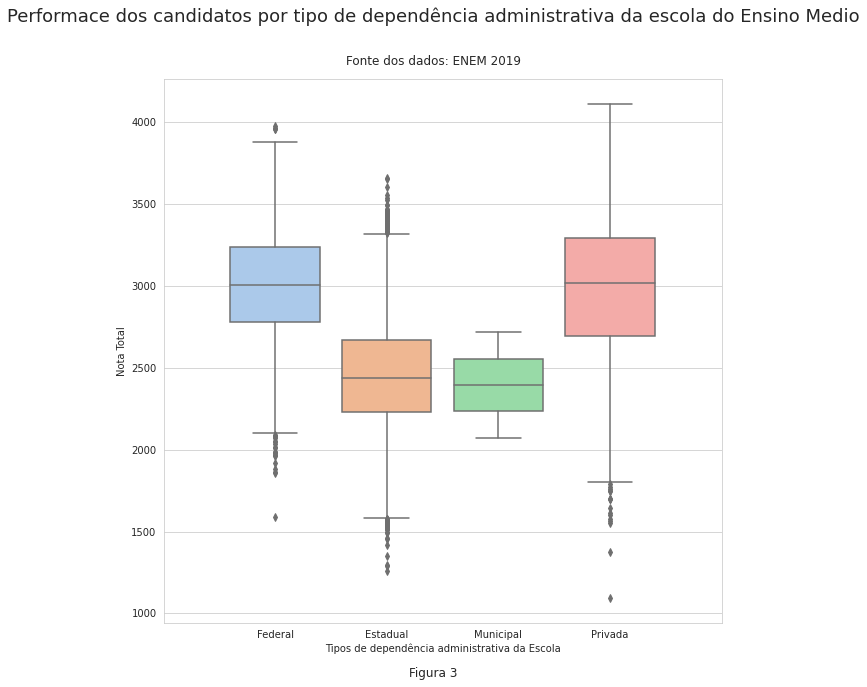

In [ ]:
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(10, 10))

ordenado = data_new["TP_DEPENDENCIA_ADM_ESC"].sort_values().unique()

sns.set_palette("pastel")
sns.boxplot(data=data_new, y = "TOTAL", x = "TP_DEPENDENCIA_ADM_ESC", order = ordenado)

plt.figtext(.5,.90,'Fonte dos dados: ENEM 2019',fontsize=12,ha='center')
plt.figtext(0.5,0.05,'Figura 3',fontsize=12,ha='center')
plt.suptitle("Performance dos candidatos por tipo de dependência administrativa da escola do Ensino Medio", size = 18)

plt.ylabel("Nota Total")
plt.xlabel("Tipos de dependência administrativa da Escola")
plt.xticks(labels=["Federal","Estadual", "Municipal","Privada"], ticks=[0,1,2,3])
plt.xlim((-1,4))

plt.show()

> É notório, a partir da **Figura 3**, que há uma baixa performace da educação estadual e municipal em relação às escolas federais e privadas. Vale lembrar que as escolas de ensino médio federais são os Institutos Federais.

### 4.4 Relação da quantidade de candidatos por renda

> Uma grande questão em relação as escolas é: **quem são candidatos que frequentam cada tipo de escola?** Quais são suas rendas, e será que todo mundo tem como pagar por uma escola privada pra ter acesso a uma boa educação?

> Infelizmente, no Brasil, de acordo com uma pesquisa do IBGE [5], cerca de 50% dos brasileiros vivem com apenas 413 reais por mês. Se a prioridade de do cidadão é comprar o básico para a sobrevivência (compra de alimentos e itens essenciais), será que esses brasileiros terão dinheiro para pagar por uma boa escola? Obviamente não.


> Para ficar mais claro a relação da renda dos candidados, na **Figura 4** foi criado um pequeno gráfico que expõe isso. Nos dados do ENEM 2019 a renda do candidato é categorizada de A até Q, onde:
* A : Não possui nenhuma renda.
* B : Até 988.00 reais 
* C : De 988.00 reais até 1497.00 reais
* D : De 1497.00 reais até 1996.00 reais
* E : De 1996.00 reais até 2495.00 reais 
* F : De 2495.00 reais até 2994.00 reais
* G : De 2994.00 reais até 3992.00 reais
* H : De 3992.00 reais até 4990.00 reais
* I : De 4990.00 reais até 5988.00 reais
* J : De 5988.00 reais até 6986.00 reais
* K : De 6986.00 reais até 7984.00 reais
* L : De 7984.00 reais até 8982.00 reais 
* M : De 8982.00 reais até 9980.00 reais
* N : De 9980.00 reais até 11976.00 reais
* O : De 11976.01 reais até 14970.00 reais
* P : De 14970.01 reais até 19960.00 reais
* Q : Mais de 19960.00 reais

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/usr/local/li

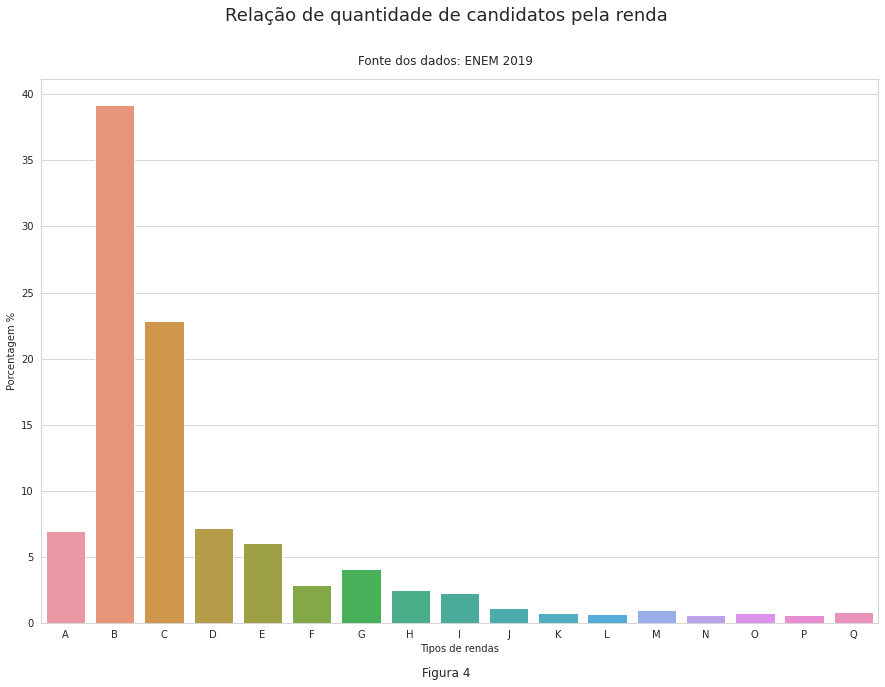

In [ ]:
# Pegando os valores #
A = data_new[data["Q006"] == 'A'].Q006.count()
B = data_new[data["Q006"] == 'B'].Q006.count()
C = data_new[data["Q006"] == 'C'].Q006.count()
D = data_new[data["Q006"] == 'D'].Q006.count()
E = data_new[data["Q006"] == 'E'].Q006.count()
F = data_new[data["Q006"] == 'F'].Q006.count()
G = data_new[data["Q006"] == 'G'].Q006.count()
H = data_new[data["Q006"] == 'H'].Q006.count()
I = data_new[data["Q006"] == 'I'].Q006.count()
J = data_new[data["Q006"] == 'J'].Q006.count()
K = data_new[data["Q006"] == 'K'].Q006.count()
L = data_new[data["Q006"] == 'L'].Q006.count()
N = data_new[data["Q006"] == 'M'].Q006.count()
M = data_new[data["Q006"] == 'N'].Q006.count()
O = data_new[data["Q006"] == 'O'].Q006.count()
P = data_new[data["Q006"] == 'P'].Q006.count()
Q = data_new[data["Q006"] == 'Q'].Q006.count()

y = [A, B, C, D, E, F, G, H, I, J, K, L, M, N, O, P, Q]
y = [(i/sum(y)) * 100 for i in y]
x = ["A", "B","C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M", "N", "O", "P", "Q"]

# Grafico de Barras #
sns.set_style("whitegrid")

f, ax = plt.subplots(figsize=(15, 10))

sns.barplot(x = x, y = y)


plt.figtext(.5,.90,'Fonte dos dados: ENEM 2019',fontsize=12,ha='center')
plt.figtext(0.5,0.05,'Figura 4',fontsize=12,ha='center')
plt.suptitle("Relação de quantidade de candidatos pela renda", size = 18)
plt.ylabel("Porcentagem %")
plt.xlabel("Tipos de rendas")

plt.show()

### 4.5 Performance das notas dos candidatos com relação a dependência administrativa da escola e o tipo de renda.

> Para encerrar a análise em relação aos dados do ENEM 2019, será feito um gráfico que analisa tudo que foi visto anteriormente em uma só imagem, **Figura 5**. É possível observar que com o aumento da renda aumenta a performance do candidato, apesar de que há pouca pessoas de rendas mais altas em relação às mais baixas. Proporcionalmente e estatisticamente, vide **Figura 4**, era pra ter mais gente indo bem nas rendas mais baixas, mas como nem todo mundo tem acesso a uma boa educação isso não é possível.

* Na legenda do boxplot: 1 é federal, 2 é estadual, 3 é municipal, e 4 é privado.

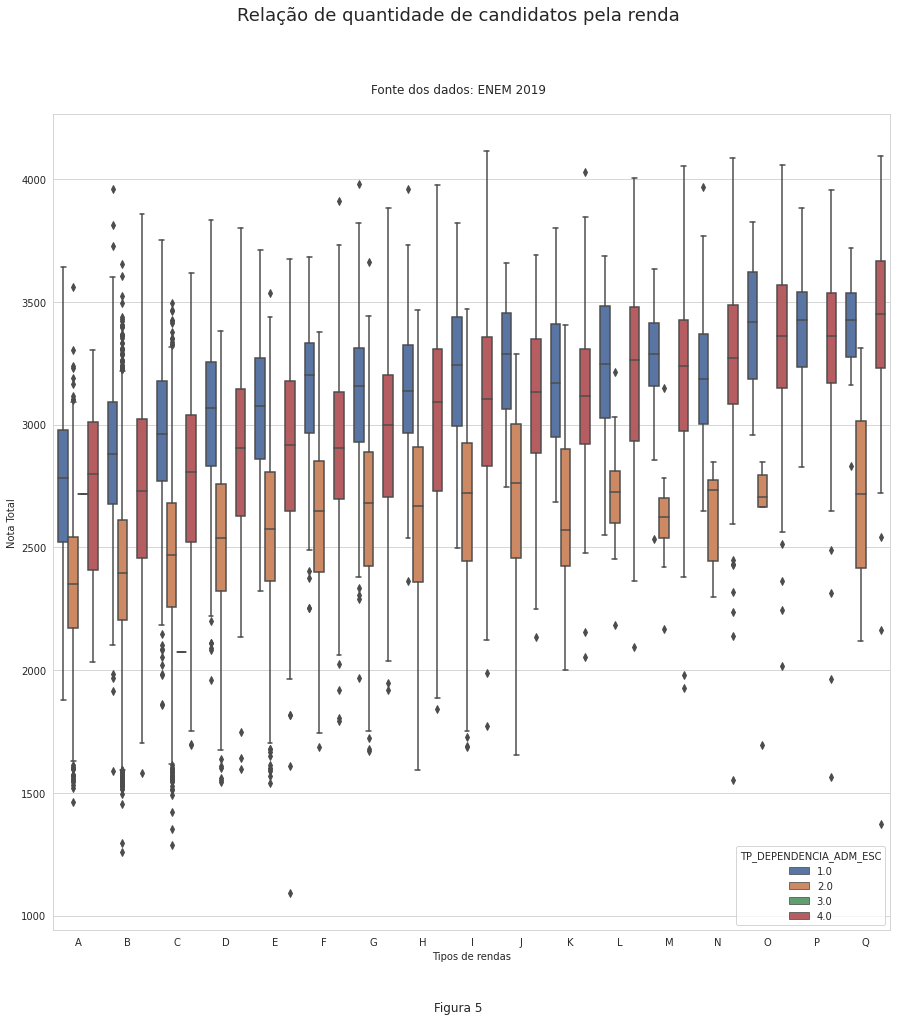

In [ ]:
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(15, 15))

ordenado = data_new["Q006"].sort_values().unique()

sns.set_palette("deep")
sns.boxplot(data=data_new, y = "TOTAL", x = "Q006", hue = "TP_DEPENDENCIA_ADM_ESC", order = ordenado)

plt.figtext(.5,.90,'Fonte dos dados: ENEM 2019',fontsize=12,ha='center')
plt.figtext(0.5,0.05,'Figura 5',fontsize=12,ha='center')
plt.suptitle("Relação de quantidade de candidatos pela renda", size = 18)
plt.ylabel("Nota Total")
plt.xlabel("Tipos de rendas")

plt.show()

### 4.6 Conclusão da análise dos dados do ENEM 2019

> Por fim, para finalizar essa análise do dados do ENEM 2019, podemos concluir que além do fato das escolas municipais e estaduais não possuírem uma qualidade boa baseado na performance dos candidatos do ENEM, e, no geral, os candidatos não possuem renda o suficiente para pagar por uma educação de qualidade(escolas privadas).

> Esses problemas geram uma grande desigualdade, porque há mais chances de alguém de renda alta entrar em uma universidade do que alguém de renda baixa, mesmo que haja mais gente de renda baixa do que alta.

### 4.7 Analisando o IDEB por depêndencia administrativa das escolas

> Neste topico iremos analisar a média das notas do IDEB em relação à dependência administrativa das escolas, **Figura 6**.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
ideb = pd.read_excel('/content/drive/My Drive/sharing/divulgacao_ensino_medio_escolas_2019.xlsx')

Mounted at /content/drive


In [ ]:
# Pegando os dados do ideb #
ideb = pd.read_excel('/content/drive/My Drive/sharing/divulgacao_ensino_medio_escolas_2019.xlsx')
ideb = ideb.iloc[8:]
index = ideb.iloc[0]
ideb.columns = index
ideb = ideb.iloc[1:]

In [ ]:
# Pegando os dados apenas do RN #

ideb = ideb[ideb["SG_UF"] == 'RN']
ideb = ideb[ideb["VL_OBSERVADO_2017"] != '-']
ideb.head()

8,SG_UF,CO_MUNICIPIO,NO_MUNICIPIO,ID_ESCOLA,NO_ESCOLA,REDE,VL_APROVACAO_2017_SI_4,VL_APROVACAO_2017_1,VL_APROVACAO_2017_2,VL_APROVACAO_2017_3,VL_APROVACAO_2017_4,VL_INDICADOR_REND_2017,VL_APROVACAO_2019_SI_4,VL_APROVACAO_2019_1,VL_APROVACAO_2019_2,VL_APROVACAO_2019_3,VL_APROVACAO_2019_4,VL_INDICADOR_REND_2019,VL_NOTA_MATEMATICA_2017,VL_NOTA_PORTUGUES_2017,VL_NOTA_MEDIA_2017,VL_NOTA_MATEMATICA_2019,VL_NOTA_PORTUGUES_2019,VL_NOTA_MEDIA_2019,VL_OBSERVADO_2017,VL_OBSERVADO_2019,VL_PROJECAO_2019,VL_PROJECAO_2021
3999,RN,2400109,Acari,24034428,ESC EST PROFA IRACEMA BRANDAO DE ARAUJO,Estadual,80.9,61.7,90,100,-,0.803889,72.4,49.3,94.9,93.3,-,0.722204,240.84,253.51,3.86716,265.69,262.02,4.34357,3.1,3.1,3.3,3.5
4000,RN,2400208,Açu,24009318,EDUCANDARIO NOSSA SRA DAS VITORIAS,Privada,97.1,93.5,98.7,100,-,0.973176,-,-,-,-,-,-,281.68,283.43,4.88866,-,-,-,4.8,-,5,5.2
4003,RN,2400406,Água Nova,24064238,ESCOLA ESTADUAL PROF PEDRO RAIMUNDO DO NASCIMENTO,Estadual,81.4,78.5,81.4,87.5,-,0.82299,83.5,85.7,67.9,91.3,-,0.803233,246.27,245.25,3.81977,263.18,280.47,4.58451,3.1,3.7,3.4,3.6
4005,RN,2400604,Almino Afonso,24021490,ESCOLA ESTADUAL ESTUDANTE RONALD NEO JUNIOR,Estadual,76.3,71.7,62.2,100,-,0.749547,90.7,86.7,89.7,100,-,0.917928,264.33,260.71,4.30486,270.94,284.04,4.74695,3.2,4.4,3.4,3.7
4009,RN,2400802,Angicos,24026557,ESCOLA ESTADUAL PROFESSOR FRANCISCO VERAS,Estadual,74.4,70,74.7,86,-,0.763349,86.8,79.8,87.2,93.1,-,0.863549,257.28,251.33,4.06542,ND,ND,-,3.1,-,3.3,3.5


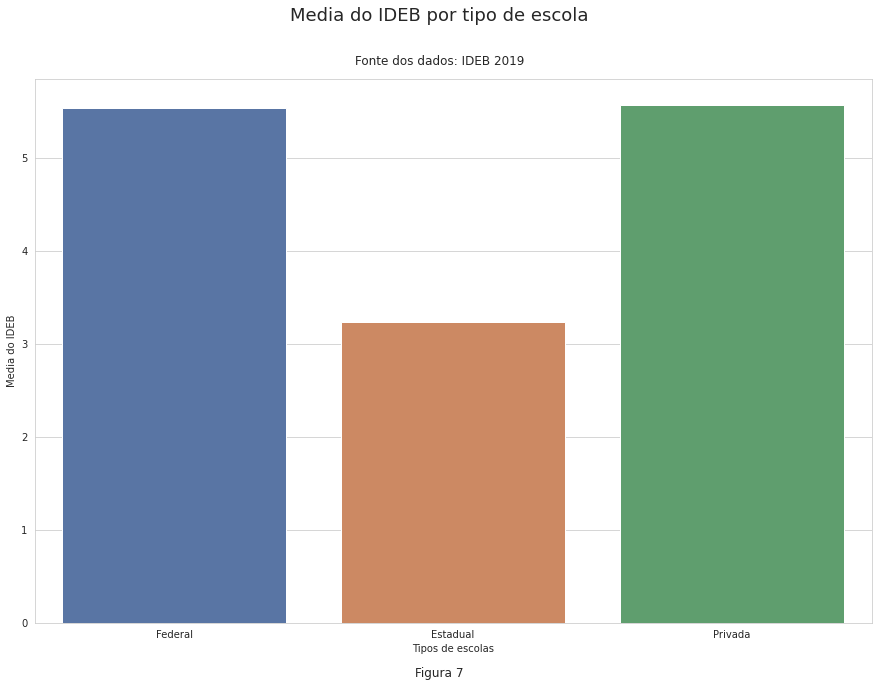

In [ ]:
# Grafico de barras para representar as medias do ideb das escolas #

estadual = ideb[ideb["REDE"] == "Estadual"]["VL_OBSERVADO_2017"].mean()
privada = ideb[ideb["REDE"] == "Privada"]["VL_OBSERVADO_2017"].mean()
federal = ideb[ideb["REDE"] == "Federal"]["VL_OBSERVADO_2017"].mean()
municipal = ideb[ideb["REDE"] == "Municipal"]["VL_OBSERVADO_2017"].mean() # Não há dados

y = [federal, estadual, privada]
x = ["Federal", "Estadual", "Privada"]

# Grafico de Barras #
sns.set_style("whitegrid")

sns.set_palette("deep")
f, ax = plt.subplots(figsize=(15, 10))

sns.barplot(x = x, y = y)


plt.figtext(.5,.90,'Fonte dos dados: IDEB 2019',fontsize=12,ha='center')
plt.figtext(0.5,0.05,'Figura 6',fontsize=12,ha='center')
plt.suptitle("Media do IDEB por tipo de escola", size = 18)
plt.ylabel("Media do IDEB")
plt.xlabel("Tipos de escolas")

plt.show()

> É possivel ver claramente a partir do dados do IDEB que a performance das escolas do ensino médio federais e privadas são melhores que a estadual.

## **5. Processamento dos dados**

> Neste tópico iremos mostrar como fizemos o processamento dos dados para melhorar os resultados do nosso modelo.

> Para fazer o nosso modelo para prever a performance dos candidatos baseado nos dados sobre a renda e a escola que irá completar o ensino médio, os dados sobre a escola são relacionados à depêndencia administrativa e às notas do IDEB.

### Fazendo um merge dos dados

In [ ]:
# Pegando as variaveis que iremos utilizar do ENEM 2019 #
enem = ["CO_ESCOLA","Q006", "NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_REDACAO", "TOTAL"]
data_enem = data_new[enem]
# Pegando as variaveis que iremos utilizar do IDEB 2019 #
data_ideb = ideb[["ID_ESCOLA", "REDE", "VL_OBSERVADO_2017"]]

In [ ]:
# Vamos retirar os valores nulos novamente só por segurança #
data_enem = data_enem.dropna()
data_ideb = data_ideb.dropna()

In [ ]:
matrix = [0] * data_enem.shape[0]
matrix2 = [0] * data_enem.shape[0]

for k, i in enumerate(data_enem["CO_ESCOLA"]):
  for (m, l, j) in zip(data_ideb["REDE"], data_ideb["VL_OBSERVADO_2017"], data_ideb["ID_ESCOLA"]):
    if(i == j):
      matrix[k] = l
      matrix2[k] = m

data_enem["NOTA_IDEB_ESCOLA"] = matrix
data_enem["REDE"] = matrix2
data_enem.head()

,CO_ESCOLA,Q006,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,TOTAL,NOTA_IDEB_ESCOLA,REDE
17,24057703.0,Q,615.8,593.9,584.1,700.6,820.0,3314.4,0.0,0
19,24020400.0,C,386.2,382.0,484.3,502.3,420.0,2174.8,4.0,Estadual
21,24058246.0,B,445.8,511.1,498.8,412.9,600.0,2468.6,0.0,0
28,24087394.0,G,539.2,554.4,609.4,633.4,940.0,3276.4,0.0,0
46,24031313.0,B,487.7,497.2,555.2,493.5,540.0,2573.6,0.0,0


> Ao fazer o merge e olharmos os dados do IDEB foi possível perceber que muitas escolas não possuíam as notas, e por causa disso será necessário remover as linhas dos candidatos que não possuem a nota do IDEB. Infelizmente, houve uma grande perda dos dados ao retirar os dados nulos. 

In [ ]:
# Tirando os valores nulos da NOTA_IDEB_ESCOLA #

d = data_enem[data_enem["NOTA_IDEB_ESCOLA"] != 0]
d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3137 entries, 19 to 119126
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CO_ESCOLA         3137 non-null   float64
 1   Q006              3137 non-null   object 
 2   NU_NOTA_CN        3137 non-null   float64
 3   NU_NOTA_CH        3137 non-null   float64
 4   NU_NOTA_LC        3137 non-null   float64
 5   NU_NOTA_MT        3137 non-null   float64
 6   NU_NOTA_REDACAO   3137 non-null   float64
 7   TOTAL             3137 non-null   float64
 8   NOTA_IDEB_ESCOLA  3137 non-null   float64
 9   REDE              3137 non-null   object 
dtypes: float64(8), object(2)
memory usage: 269.6+ KB


### 5.1 Retirando os outliers dos dados

> Retirar os outliers da base de dados é extremamente importante para melhorar a performance do modelo.

In [ ]:
# Criando uma função para eliminar os outliers #
def outliers(data, lista, factor):

  for i in lista:

    upper_lim = data[i].mean () + data[i].std () * factor
    lower_lim = data[i].mean () - data[i].std () * factor

    data = data[(data[i] < upper_lim) & (data[i] > lower_lim)]

  return data

In [ ]:
# Outliers #

lista = ["NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_REDACAO", "TOTAL"]
d = outliers(d, lista, 2.5)

### 5.2 One-Hot Encoding

> Neste tópico iremos trabalhar com os dados categóricos. Nos dados do ENEM 2019, as rendas são separadas por A até Q, isso é um exemplo de dados categóricos. E para deixar eles úteis para o nosso modelo, esses dados de renda serão 'binarizados' e transformados e N-1 colunas (sendo N o numero de dados categóricos).

> E além da renda, o tipo de escola é um dado categórico que iremos 'binarizar'.

In [ ]:
# One-Hot Encoding #

# Primeiro para a renda #
encoded_columns = pd.get_dummies(d['Q006'])
d = d.join(encoded_columns).drop('Q006', axis=1)
d.head()

,CO_ESCOLA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,TOTAL,NOTA_IDEB_ESCOLA,REDE,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q
19,24020400.0,386.2,382.0,484.3,502.3,420.0,2174.8,4.0,Estadual,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
100,24096008.0,416.0,446.6,384.6,519.9,520.0,2287.1,4.6,Estadual,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
107,24028444.0,410.8,490.6,499.1,435.6,560.0,2396.1,2.9,Estadual,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
180,24096008.0,523.9,591.2,518.7,519.4,720.0,2873.2,4.6,Estadual,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
225,24048739.0,347.2,517.5,484.3,433.3,560.0,2342.3,2.8,Estadual,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Agora fazendo o mesmo para os tipos de escola #

encoded_columns = pd.get_dummies(d['REDE'])
d = d.join(encoded_columns).drop('REDE', axis=1)
d.head()

,CO_ESCOLA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,TOTAL,NOTA_IDEB_ESCOLA,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,Estadual,Federal,Privada
19,24020400.0,386.2,382.0,484.3,502.3,420.0,2174.8,4.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
100,24096008.0,416.0,446.6,384.6,519.9,520.0,2287.1,4.6,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
107,24028444.0,410.8,490.6,499.1,435.6,560.0,2396.1,2.9,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
180,24096008.0,523.9,591.2,518.7,519.4,720.0,2873.2,4.6,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
225,24048739.0,347.2,517.5,484.3,433.3,560.0,2342.3,2.8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
d = d.iloc[:, 1:]
d.head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,TOTAL,NOTA_IDEB_ESCOLA,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,Estadual,Federal,Privada
19,386.2,382.0,484.3,502.3,420.0,2174.8,4.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
100,416.0,446.6,384.6,519.9,520.0,2287.1,4.6,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
107,410.8,490.6,499.1,435.6,560.0,2396.1,2.9,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
180,523.9,591.2,518.7,519.4,720.0,2873.2,4.6,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
225,347.2,517.5,484.3,433.3,560.0,2342.3,2.8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


### 5.3 Normalização dos dados

> É de extrema importância normalizar os valores para o nosso modelo, porque muita vezes, dependendo do banco de dados, há uma dicrepância enorme entre as variáveis que queremos trabalhar. Por exemplo, idade do indivíduo e salário: normalmente salários são valores grandes e idades são valores pequenos.

In [ ]:
def normalization(data, lista):
  
  for i in lista:

    data[i] = (data[i] - data[i].min()) / (data[i].max() - data[i].min())

  return data

In [ ]:
# Normalização #
lista = ["NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_REDACAO", "TOTAL", "NOTA_IDEB_ESCOLA"]
d = normalization(d, lista)
d.head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,TOTAL,NOTA_IDEB_ESCOLA,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,Estadual,Federal,Privada
19,0.124160,0.502764,0.708870,0.237935,0.428571,0.368414,0.375000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
100,0.190946,0.587786,0.562939,0.267634,0.530612,0.406662,0.482143,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
107,0.179292,0.645696,0.730533,0.125380,0.571429,0.443786,0.178571,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
180,0.432766,0.778099,0.759221,0.266790,0.734694,0.606280,0.482143,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
225,0.036755,0.681100,0.708870,0.121498,0.571429,0.425462,0.160714,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


> Após fazer o pré-processamento podemos ver a correlação dos nossos dados:

In [ ]:
d.corr()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,TOTAL,NOTA_IDEB_ESCOLA,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,Estadual,Federal,Privada
NU_NOTA_CN,1.000000,0.685548,0.681861,0.684696,0.557347,0.816181,0.583984,-0.138100,-0.268912,-0.038266,0.030723,0.043809,0.044523,0.063052,0.082873,0.099620,0.082815,0.092397,0.063902,0.081990,0.124491,0.121392,0.151724,0.201339,-0.544888,0.250654,0.389350
NU_NOTA_CH,0.685548,1.000000,0.769978,0.638566,0.620825,0.845374,0.554450,-0.131440,-0.247959,-0.039726,0.047075,0.015012,0.045160,0.075460,0.060860,0.118146,0.075642,0.088810,0.070371,0.081541,0.103980,0.107749,0.140826,0.172296,-0.468820,0.228591,0.323156
NU_NOTA_LC,0.681861,0.769978,1.000000,0.630457,0.627798,0.835265,0.558283,-0.134707,-0.253353,-0.030216,0.027906,0.036144,0.067571,0.090506,0.042448,0.115992,0.061596,0.088518,0.055551,0.083297,0.120330,0.114289,0.114581,0.160132,-0.483020,0.253586,0.316397
NU_NOTA_MT,0.684696,0.638566,0.630457,1.000000,0.546762,0.820278,0.591296,-0.145569,-0.272570,-0.074379,0.026135,0.045313,0.061164,0.069398,0.080077,0.118120,0.085950,0.123439,0.089821,0.098247,0.137547,0.113212,0.179645,0.208898,-0.509084,0.229480,0.368074
NU_NOTA_REDACAO,0.557347,0.620825,0.627798,0.546762,1.000000,0.867257,0.513287,-0.101927,-0.214376,-0.035907,0.016974,0.039889,0.035180,0.071718,0.068518,0.062087,0.066435,0.083690,0.058358,0.084804,0.098493,0.085539,0.124971,0.133213,-0.437816,0.194445,0.319210
TOTAL,0.816181,0.845374,0.835265,0.820278,0.867257,1.000000,0.656536,-0.148995,-0.291247,-0.052913,0.032165,0.044313,0.056628,0.086371,0.081825,0.113069,0.087925,0.112868,0.080276,0.102857,0.135866,0.123417,0.168849,0.201144,-0.569860,0.264859,0.404706
NOTA_IDEB_ESCOLA,0.583984,0.554450,0.558283,0.591296,0.513287,0.656536,1.000000,-0.187162,-0.322500,-0.061650,0.037177,0.053022,0.061813,0.070804,0.103910,0.115627,0.103950,0.112858,0.114587,0.099606,0.162490,0.157462,0.206668,0.248487,-0.839208,0.437775,0.552286
A,-0.138100,-0.131440,-0.134707,-0.145569,-0.101927,-0.148995,-0.187162,1.000000,-0.181481,-0.134572,-0.073529,-0.072357,-0.048347,-0.056772,-0.045736,-0.044004,-0.029098,-0.026801,-0.022949,-0.022482,-0.031578,-0.026400,-0.029465,-0.035449,0.152853,-0.043323,-0.133938
B,-0.268912,-0.247959,-0.253353,-0.272570,-0.214376,-0.291247,-0.322500,-0.181481,1.000000,-0.372534,-0.203551,-0.200306,-0.133840,-0.157161,-0.126611,-0.121817,-0.080553,-0.074194,-0.063529,-0.062236,-0.087416,-0.073083,-0.081567,-0.098133,0.283480,-0.028026,-0.296310
C,-0.038266,-0.039726,-0.030216,-0.074379,-0.035907,-0.052913,-0.061650,-0.134572,-0.372534,1.000000,-0.150936,-0.148530,-0.099244,-0.116538,-0.093884,-0.090329,-0.059731,-0.055016,-0.047108,-0.046149,-0.064821,-0.054193,-0.060483,-0.072767,0.060098,0.050710,-0.114695


## **6. Criando o Modelo de Machine Learning**


### 6.1 Modelo de SVR

> Primeiros vamos construir um modelo simples utilizando a teoria de Support Machine Vector para Regressão, que chamado de Support Vector Regressor. Para criar nosso modelo SVR foram utilizados três parâmetros que alteram os valores do modelo criado: **Epsilon**, **Kernel** e **Degree**.
* Degree : Ele vai dizer qual é o grau do nosso Kernel.
* Kernel : É tipo da curva do nosso modelo.
* Epsilon : Determina a penalidade dentro do epsilon-tube.

> Para criar o melhor modelo foram testadas várias possibilidades para os parâmetros mencionados anteriormente. Para avaliar se o modelo está bom, utilizaremos uma métrica chamada r squared. Na metrica r squared, quanto mais próximo de 1 melhor, sendo também possível ter números negativos que mostram o quão horrível é o modelo.

In [ ]:
# Dividindo os dados em train e test #
from sklearn.model_selection import train_test_split

x_columns = d.iloc[:, 6:].columns

x = d[x_columns]
y = d["TOTAL"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state = 0)

In [ ]:
# Criando uma funçãão que gera um modelo de SVR #
from sklearn import svm

def svr(kernel, epsilon, degree, x_train, x_test, y_train, y_test):

  print(kernel, epsilon, degree)
  regr = svm.SVR(kernel=kernel, epsilon=epsilon, degree=degree)
  regr.fit(x_train, y_train)
  print("Score Train: ", regr.score(x_train, y_train), " Score Test: ", regr.score(x_test, y_test))

> Agora que criamos uma função que gera nosso modelo e que printa o score tanto dos dados de treino e teste, podemos ver os melhores parâmetros e avalir o r squared.

In [ ]:
svr('linear', 1, 3, x_train, x_test, y_train, y_test)
svr('poly', 0.2, 7, x_train, x_test, y_train, y_test)
svr('rbf', 0.2, 7, x_train, x_test, y_train, y_test)
svr('poly', 0.2, 10, x_train, x_test, y_train, y_test)
svr('poly', 0.1, 10, x_train, x_test, y_train, y_test)

linear 1 3
Score Train:  -0.21033953250761872  Score Test:  -0.2366733564983223
poly 0.2 7
Score Train:  0.4235719431974452  Score Test:  0.43387451364066476
rbf 0.2 7
Score Train:  0.4222702782223287  Score Test:  0.43794202027537144
poly 0.2 10
Score Train:  0.42028169198006904  Score Test:  0.43362274969826686
poly 0.1 10
Score Train:  0.4616638703203529  Score Test:  0.4769397771656485


### 6.2 Modelo de Árvore de Decisão

> Em seguida iremos criar um modelo bastante utlizado que é o de Árvore de Decisão. Esse modelo tem como objetivo criar 'regras' para dizer qual  caminho que nossas amostras devem seguir até o valor a ser 'predizido'. Nesse modelo iremos utilizar também três parâmetros: **Criterion**, **Max_Deph** e **Random_State**.
* Criterion : É o critério de erro do modelo.
* Max_Deph : É o tamanho da nossa árvore, quanto maior for ela, maior serão as regras
* Random_State : Deixa os nosso dados mais 'randomizados' o possível, pois a aleatoriedade é importante na hora de fazer o modelo. Para avaliar se o modelo está bom, utilizaremos uma métrica chamada r squared. Na metrica r squared, quanto mais próximo de 1 melhor, sendo também possível ter números negativos que mostram o quão horrível é o modelo.

In [ ]:
# Criando nosso modelo de árvore de decisão #
from sklearn import tree

def arvore(criterion, max_deph, random_state, x_train, x_test, y_train, y_test):

  print(criterion, max_deph, random_state)
  clf = tree.DecisionTreeRegressor(criterion=criterion, max_depth=max_deph, random_state=random_state)
  clf.fit(x_train, y_train)
  print("Score Train: ", clf.score(x_train, y_train), " Score Test: ", clf.score(x_test, y_test))

> Criado o modelo, agora iremos verificar os melhores parâmetros e avaliar o r squared.

In [ ]:
arvore("mse", 5, 2, x_train, x_test, y_train, y_test)
arvore("mse", 10, 2, x_train, x_test, y_train, y_test)
arvore("mse", 19, 2, x_train, x_test, y_train, y_test)
arvore("mse", 25, 2, x_train, x_test, y_train, y_test)
arvore("mse", 16, 2, x_train, x_test, y_train, y_test)

mse 5 2
Score Train:  0.4684517380792096  Score Test:  0.5011912256188233
mse 10 2
Score Train:  0.5242918153575681  Score Test:  0.48190974865698266
mse 19 2
Score Train:  0.5493524654335482  Score Test:  0.46797649433056954
mse 25 2
Score Train:  0.5494242250826261  Score Test:  0.4666553773693968
mse 16 2
Score Train:  0.5463405081140349  Score Test:  0.4669898919795573


## **7. Avaliando o Modelo de Machine Learning**

> No primeiro modelo, SVR, é notório que quanto menor é o Epsilon melhor, e quanto maior o grau da curva polinomial melhor fica o nosso modelo. E no nosso segundo modelo, árvore de decisões, quanto maior é a nossa árvore, melhor é o nosso modelo.

> Entretanto, foi observado que toda vez que a gente alterava os dados de teste e de treino as métricas r squared dos modelos alteravam um pouco. Para não haver dúvidas se o modelo está tendo um **Overfitting ou um underfitting** iremos criar um algoritmo para gerar vários modelos para diferentes dados de treino e de teste.

In [ ]:
import random 

for i in range(1, 11):
  print("Teste: ", i)

  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state = random.randint(0, 1000))
  print("SVR: ", "\n")
  svr('poly', 0.2, 10, x_train, x_test, y_train, y_test)
  svr('poly', 0.1, 10, x_train, x_test, y_train, y_test)

  print("\n", "Árvore de decisão: ")
  arvore("mse", 19, 2, x_train, x_test, y_train, y_test)
  arvore("mse", 25, 2, x_train, x_test, y_train, y_test)

Teste:  1
SVR:  

poly 0.2 10
Score Train:  0.43004349137663367  Score Test:  0.4183276490253146
poly 0.1 10
Score Train:  0.47397158226648617  Score Test:  0.42808503244928875

 Árvore de decisão: 
mse 19 2
Score Train:  0.564226217851715  Score Test:  0.4164425949275141
mse 25 2
Score Train:  0.5652770939585727  Score Test:  0.4197075347568939
Teste:  2
SVR:  

poly 0.2 10
Score Train:  0.4309517457507732  Score Test:  0.39635886991947966
poly 0.1 10
Score Train:  0.4681347518379442  Score Test:  0.444331308363336

 Árvore de decisão: 
mse 19 2
Score Train:  0.5583034303483747  Score Test:  0.45453023686392524
mse 25 2
Score Train:  0.5608223737384006  Score Test:  0.45678272534054526
Teste:  3
SVR:  

poly 0.2 10
Score Train:  0.4344182275562958  Score Test:  0.3798333449559216
poly 0.1 10
Score Train:  0.48113452347956964  Score Test:  0.4053460095203697

 Árvore de decisão: 
mse 19 2
Score Train:  0.571269606300014  Score Test:  0.35943960338213143
mse 25 2
Score Train:  0.5724248

> Após randomiar os dados de teste e treino percebeu-se que não há alterações drásticas nos resultados obtidos. **E por fim, pode-se dizer que o modelo de árvore de decisão obteve um score melhor, em relação ao SVR, para resolver este problema.**

> Para verificar a veracidade do modelo de árvore de decisão, será aplicado o **cross validation**.

(15,) 15


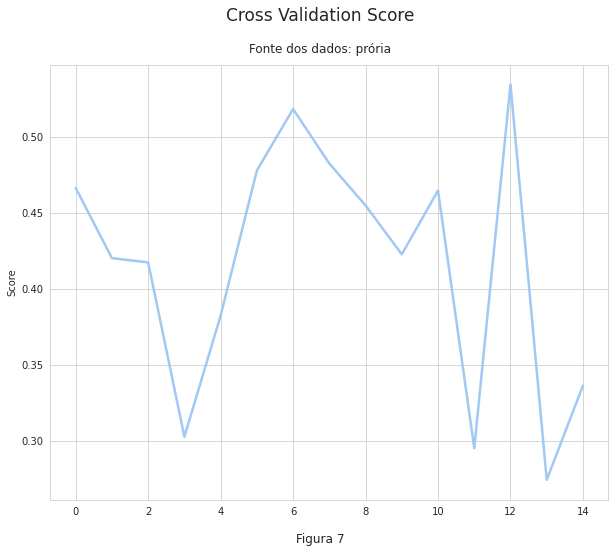

In [ ]:
from sklearn.model_selection import cross_val_score

regressor = tree.DecisionTreeRegressor(random_state=random.randint(0, 1000))
y_g = cross_val_score(regressor, x, y, cv=15)
x_g = [*range(0, 15)]

print(y_g.shape, len(x_g))

fig, ax = plt.subplots(figsize=(10, 8))

sns.set_style("whitegrid")
sns.set_palette("pastel")

sns.lineplot(y=y_g, x=x_g, linewidth=2.5, ax=ax)

plt.suptitle("Cross Validation Score", size=17)
#plt.suptitle("Proporção dos candidatos: por tipo de escola do Ensino Medio", y=1.5, fontsize=18)
plt.figtext(.5,.9,'Fonte dos dados: prória',fontsize=12,ha='center')
plt.figtext(0.5,0.05,'Figura 7',fontsize=12,ha='center')
plt.ylabel("Score")

plt.show()

## **8. Conclusão e Resultados**

> Baseados nos dados da educação disponibilizados pelo Ministério da Educação e no modelo criado para prever e correlacionar esses dados, é possível afirmar que a educação básica ainda é ruim dentro do Rio Grande do Norte. Poucos tem acesso a uma educação de qualidade, e os que tem acesso são aqueles que possuem renda o suficiente para pagar por uma boa educação.

> O modelo criado utilizando Machine Learning consegue, com uma performace razoável, predizer a nota total do candidato baseado na sua renda e na educação que teve no ensino médio. Entretanto ainda há muitos dados que possam ser estudados futuramente para poder melhorar esse modelo de previsão.

> Um dos grandes problemas nesse modelo criado foi a falta de dados: muitos dados relacionados ao IDEB estavam em falta, o que levou a uma grande redução dos dados, assim limitando o modelo.

## **9. Referências**

[1] Artigo 205 da constituição: https://www.senado.leg.br/atividade/const/con1988/CON1988_05.10.1988/art_205_.asp

[2] Pesquisa do IBGE: https://www.redebrasilatual.com.br/cidadania/2019/06/pesquisa-ibge-mostra-que-educacao-brasileira-ainda-nao-e-para-todos/

[3] ENEM 2019: http://inep.gov.br/microdados

[4] IDEB: https://www.gov.br/inep/pt-br/areas-de-atuacao/pesquisas-estatisticas-e-indicadores/ideb/resultados

[5] Pesquisa do IBGE: https://www.cut.org.br/noticias/metade-dos-brasileiros-vive-com-apenas-r-413-por-mes-diz-ibge-6de3